CMSC320 Final Project — Checkpoint 2

Dataset: NBA Player Statistics

Group Members: Anitej Suklikar, Joshua John, Sachin Kumar, Akhil Metukuru, Purab Shah, Sohum Desai

GitHub Repository: [CMSC320-Final-Project](https://github.com/TejSuklikar/CMSC320-Final-Project)

Dataset: [NBA Player Statistics](https://www.kaggle.com/datasets/marcsperzel/nba-player-statistics?resource=download)



# **SECTION 1: Data Preproccesing**

Import all of our neccesary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load data as a CSV

In [2]:
nba_df = pd.read_csv("nba_player_data.csv")

View the Dataframe

In [3]:
nba_df.head()

,_id,GAME_ID,GAME_DATE,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,...,E_PACE,AST_RATIO,DIST,AST_TOV,FTA_RATE,OPP_FTA_RATE,MIN,PACE_PER40,PACE,PIE
0,6257e8a35ccc080408fc781f,21500395.0,2015-12-18,1.610613e+09,UTA,Utah,202353.0,Tibor Pleiss,Tibor,NaN,...,0.00,0.0,0.00,0.0,0.000,0.000,0.00,0.00,0.00,0.000
1,6257e8a35ccc080408fc7814,21500395.0,2015-12-18,1.610613e+09,UTA,Utah,1626168.0,Trey Lyles,Trey,F,...,87.14,12.5,1.76,1.0,0.333,0.372,26.06,72.03,86.44,0.094
2,6257e8a35ccc080408fc7815,21500395.0,2015-12-18,1.610613e+09,UTA,Utah,202324.0,Derrick Favors,Derrick,C,...,86.71,0.0,2.39,0.0,0.291,0.267,35.27,71.65,85.98,0.020
3,6257e8a35ccc080408fc7807,21500395.0,2015-12-18,1.610613e+09,DEN,Denver,201568.0,Danilo Gallinari,Danilo,F,...,90.37,14.3,2.22,0.0,0.233,0.377,33.43,75.93,91.11,0.050
4,6257e8a35ccc080408fc7810,21500395.0,2015-12-18,1.610613e+09,DEN,Denver,203123.0,Kostas Papanikolaou,Kostas,NaN,...,96.36,0.0,0.87,0.0,0.733,0.294,11.28,78.49,94.19,0.000


Now that we've imported the dataset, we'll clean it to ensure consistent formats and remove unnecessary information.  
We'll:
- Convert date columns to datetime  
- Drop irrelevant identifier columns  
- Check for missing values and duplicates  
- Verify data types for numerical consistency

In [4]:
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'], errors='coerce')
nba_df = nba_df.drop(columns=['_id', 'GAME_ID', 'TEAM_ID', 'PLAYER_ID'], errors='ignore')
duplicates = nba_df.duplicated().sum()
missing_values = nba_df.isnull().sum().sort_values(ascending=False)
print(f"Total Rows: {len(nba_df)}")
print(f"Total Columns: {len(nba_df.columns)}")
print(f"Duplicate Rows: {duplicates}\n")
print("Top 10 columns with most missing values:")
print(missing_values.head(10))

num_cols = ['MIN','PTS','REB','AST','TO','STL','BLK','FG_PCT','FG3_PCT','FT_PCT','PIE']
nba_df[num_cols] = nba_df[num_cols].apply(pd.to_numeric, errors='coerce')
print("Schema Information:")
nba_df.info()
print("\nMissing values in key numeric columns:")
print(nba_df[num_cols].isna().sum())


Total Rows: 202961
Total Columns: 111
Duplicate Rows: 0

Top 10 columns with most missing values:
START_POSITION       125025
TEAM_ABBREVIATION         1
GAME_DATE                 1
TEAM_CITY                 1
PLAYER_NAME               1
NICKNAME                  1
PCT_FGA_2PT               1
PCT_AST_2PM               1
PCT_PTS_2PT               1
AST_PCT                   1
dtype: int64
Schema Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202961 entries, 0 to 202960
Columns: 111 entries, GAME_DATE to PIE
dtypes: datetime64[ns](1), float64(105), object(5)
memory usage: 171.9+ MB

Missing values in key numeric columns:
MIN        1
PTS        1
REB        1
AST        1
TO         1
STL        1
BLK        1
FG_PCT     1
FG3_PCT    1
FT_PCT     1
PIE        1
dtype: int64


- We'll now create a cleaner version of the dataset containing only relevant columns for analysis.  
- We'll focus on player performance metrics such as points, assists, rebounds, turnovers, and shooting percentages, while keeping identifiers like player name, team, and date.  
- We’ll also handle missing values (like `START_POSITION`) and verify that numeric columns are correctly formatted.

In [5]:
key_columns = [
    'GAME_DATE', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_NAME', 'START_POSITION',
    'MIN', 'PTS', 'REB', 'AST', 'TO', 'STL', 'BLK', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PIE'
]

nba_clean = nba_df[key_columns].copy()

nba_clean['START_POSITION'] = nba_clean['START_POSITION'].fillna('Bench')

nba_clean = nba_clean.dropna(subset=['PTS', 'REB', 'AST', 'TO', 'FG_PCT'])

nba_clean.head()

,GAME_DATE,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,PTS,REB,AST,TO,STL,BLK,FG_PCT,FG3_PCT,FT_PCT,PIE
0,2015-12-18,UTA,Utah,Tibor Pleiss,Bench,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000
1,2015-12-18,UTA,Utah,Trey Lyles,F,26.06,6.0,6.0,1.0,1.0,0.0,0.0,0.500,0.00,0.0,0.094
2,2015-12-18,UTA,Utah,Derrick Favors,C,35.27,7.0,9.0,0.0,1.0,1.0,0.0,0.250,0.00,0.6,0.020
3,2015-12-18,DEN,Denver,Danilo Gallinari,F,33.43,11.0,1.0,2.0,0.0,0.0,0.0,0.299,0.25,1.0,0.050
4,2015-12-18,DEN,Denver,Kostas Papanikolaou,Bench,11.28,1.0,2.0,0.0,2.0,1.0,0.0,0.000,0.00,0.5,0.000


# **SECTION 2: Basic Data Exploration and Summary Statistics**

**2.1 Descriptive Statistics and Distribution Analysis**
- We begin by exploring the overall distribution of player performance metrics.  
- We calculate summary statistics for **Points (PTS)**, **Assists (AST)**, and **Rebounds (REB)** to understand the central tendency and spread of the data, and visualize these metrics using histograms and boxplots.


Summary Statistics:

                 PTS            AST            REB
count  202960.000000  202960.000000  202960.000000
mean        8.051675       1.760953       3.349335
std         8.212210       2.392892       3.507131
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         6.000000       1.000000       2.000000
75%        13.000000       3.000000       5.000000
max        62.000000      24.000000      30.000000


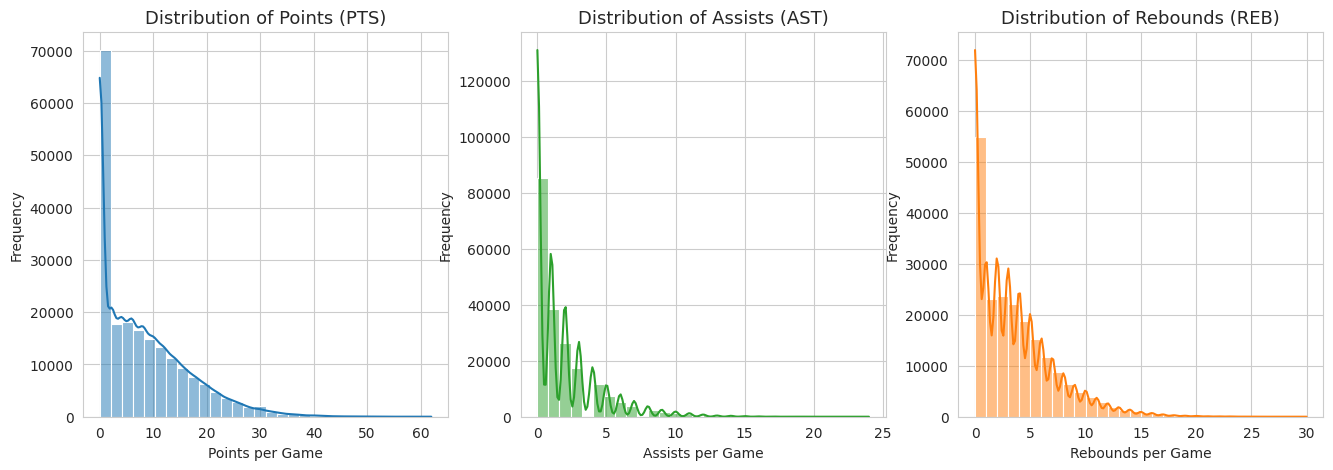

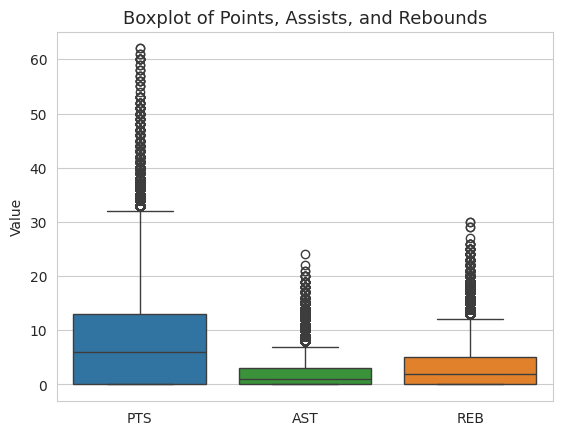

In [6]:
print("Summary Statistics:\n")
print(nba_clean[['PTS', 'AST', 'REB']].describe())

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

sns.histplot(nba_clean['PTS'], bins=30, kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Distribution of Points (PTS)', fontsize=13)
axes[0].set_xlabel('Points per Game')
axes[0].set_ylabel('Frequency')

sns.histplot(nba_clean['AST'], bins=30, kde=True, color=colors[1], ax=axes[1])
axes[1].set_title('Distribution of Assists (AST)', fontsize=13)
axes[1].set_xlabel('Assists per Game')
axes[1].set_ylabel('Frequency')

sns.histplot(nba_clean['REB'], bins=30, kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Distribution of Rebounds (REB)', fontsize=13)
axes[2].set_xlabel('Rebounds per Game')
axes[2].set_ylabel('Frequency')

plt.show()

sns.boxplot(data=nba_clean[['PTS', 'AST', 'REB']], palette=colors)
plt.title('Boxplot of Points, Assists, and Rebounds', fontsize=13)
plt.ylabel('Value')
plt.show()


**Conclusion:**  
All three metrics are heavily right-skewed. Most players record low values per game, while a few players contribute exceptional performances. Points (PTS) show the widest spread and most outliers, indicating that scoring is the most variable statistic across players. This suggests that when modeling or comparing players, normalization may be useful to handle skewness.


**2.2 Relationship Analysis Using Scatter Plots**
- This section examines the trade-off between playmaking and decision-making risk among players.
- The relationship between Assists (AST) and Turnovers (TO) is analyzed to understand how ball-handling activity influences performance outcomes.
- Since players who create more scoring opportunities usually handle the ball more often, we expect a strong positive correlation between assists and turnovers.

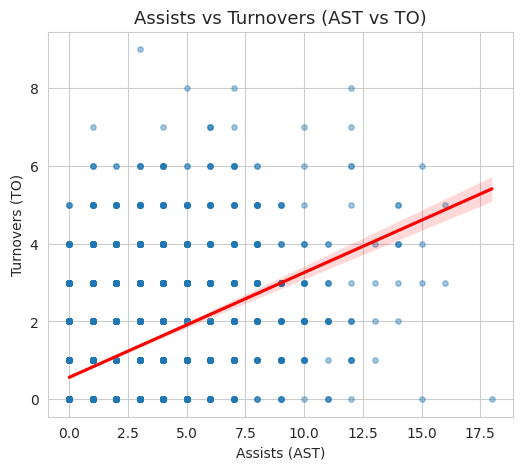

In [7]:
ast_to_sample = nba_clean.sample(5000, random_state=42)

plt.figure(figsize=(6, 5))
sns.regplot(
    x='AST', y='TO', data=ast_to_sample,
    scatter_kws={'alpha': 0.4, 's': 15, 'color': '#1f77b4'},
    line_kws={'color': 'red'}
)
plt.title('Assists vs Turnovers (AST vs TO)', fontsize=13)
plt.xlabel('Assists (AST)')
plt.ylabel('Turnovers (TO)')
plt.show()


**Conclusion:**

The scatter plot reveals a strong positive relationship between assists (AST) and turnovers (TO). Players who record more assists also tend to commit more turnovers, reflecting the inherent trade-off between playmaking and risk. This pattern aligns with basketball intuition: the players most involved in creating scoring opportunities are also the ones most likely to make errors due to their high volume of ball handling. Overall, the data highlights that increased offensive responsibility brings both reward and risk, emphasizing how elite playmakers balance creativity with control.

**2.3 Hypothesis Testing**
- This section examines whether players who play more minutes per game tend to have a higher overall impact, measured by the Player Impact Estimate (PIE).
- We divide players into two groups: High Minutes (above-average minutes played) and Low Minutes (below-average minutes played).
- The goal is to determine if there is a statistically significant difference in their mean PIE scores.

- Hypotheses:
  *   Null Hypothesis (H₀): There is no difference in mean PIE between high-minute and low-minute players.

  *   Alternative Hypothesis (Hₐ): Players who play more minutes have a higher mean PIE than those who play fewer minutes.

T-statistic: 92.0509
P-value: < 0.001 (highly significant)


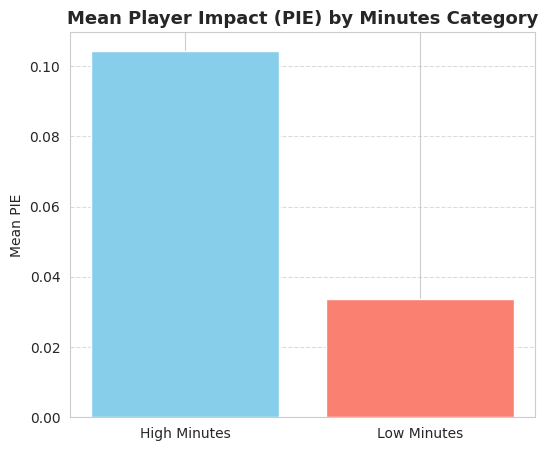

In [8]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

avg_minutes = nba_clean['MIN'].mean()

high_min = nba_clean[nba_clean['MIN'] > avg_minutes]['PIE']
low_min = nba_clean[nba_clean['MIN'] <= avg_minutes]['PIE']

t_stat, p_val = ttest_ind(high_min, low_min, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
if p_val < 0.001:
    print("P-value: < 0.001 (highly significant)")
else:
    print(f"P-value: {p_val:.4f}")

nba_clean['Minute_Group'] = 'Low Minutes'
nba_clean.loc[nba_clean['MIN'] > avg_minutes, 'Minute_Group'] = 'High Minutes'

means = [np.mean(high_min), np.mean(low_min)]

plt.figure(figsize=(6,5))
plt.bar(['High Minutes', 'Low Minutes'], means, color=['skyblue','salmon'])
plt.title('Mean Player Impact (PIE) by Minutes Category', fontsize=13, weight='bold')
plt.ylabel('Mean PIE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Conclusion:**

Since the p-value is far below 0.05, we reject the null hypothesis (H₀) and accept the alternative hypothesis (Hₐ). This means that players who log more minutes per game have a significantly higher Player Impact Estimate (PIE). In practical terms, this suggests that greater playing time corresponds with increased overall contribution to team performance. The bar chart supports this finding by showing that the High Minutes group has a visibly higher mean PIE than the Low Minutes group. The difference in bar heights clearly reflects that players who spend more time on the court tend to have a stronger overall impact on team performance.